<a href="https://colab.research.google.com/github/swethaj06/Cyber_attack-prediction/blob/main/project1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,r2_score,mean_absolute_error,mean_squared_error
data = pd.read_csv('/content/drive/MyDrive/todo.csv')
data.head()

<ipython-input-20-4c962cbc3b81>:14: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/todo.csv')


,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
0,1.0,68.156.227.194,194.91.121.112,India,USA,ICMP,16824.0,53410.0,Brute Force,3936.0,Detected,0.600507,K-Nearest Neighbors,Cloud Storage,Other,NaN
1,2.0,249.221.229.41,3.207.120.235,Germany,USA,TCP,23977.0,31745.0,Advanced Persistent Threat (APT),2870.0,Detected,0.524150,K-Nearest Neighbors,Network Router,Other,NaN
2,4.0,154.55.209.171,132.115.33.82,USA,China,UDP,36556.0,38880.0,Cross-Site Scripting (XSS) Attack,3833.0,Not Detected,0.238944,Neural Network,Workstation,Other,NaN
3,5.0,106.61.204.27,40.61.49.130,France,France,UDP,14724.0,21669.0,Insider Threat,4301.0,Not Detected,0.122334,Neural Network,Workstation,Other,NaN
4,6.0,144.190.250.125,34.68.66.192,South Korea,Germany,TCP,44693.0,6474.0,Watering Hole Attack,4569.0,Detected,0.970895,Neural Network,Application Server,Other,NaN


In [ ]:
data.columns

Index(['Attack ID', 'Source IP', 'Destination IP', 'Source Country',
       'Destination Country', 'Protocol', 'Source Port', 'Destination Port',
       'Attack Type', 'Payload Size (bytes)', 'Detection Label',
       'Confidence Score', 'ML Model', 'Affected System', 'Port Type',
       'Timestamp'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Attack ID','Detection Label',"Confidence Score","ML Model","Port Type","Timestamp"], inplace=False)
data

,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Affected System
0,68.156.227.194,194.91.121.112,India,USA,ICMP,16824.0,53410.0,Brute Force,3936.0,Cloud Storage
1,249.221.229.41,3.207.120.235,Germany,USA,TCP,23977.0,31745.0,Advanced Persistent Threat (APT),2870.0,Network Router
2,154.55.209.171,132.115.33.82,USA,China,UDP,36556.0,38880.0,Cross-Site Scripting (XSS) Attack,3833.0,Workstation
3,106.61.204.27,40.61.49.130,France,France,UDP,14724.0,21669.0,Insider Threat,4301.0,Workstation
4,144.190.250.125,34.68.66.192,South Korea,Germany,TCP,44693.0,6474.0,Watering Hole Attack,4569.0,Application Server
...,...,...,...,...,...,...,...,...,...,...
99995,249.190.160.222,92.174.237.234,China,UK,ICMP,16359.0,53207.0,Cross-Site Scripting (XSS) Attack,2152.0,Email Server
99996,86.76.247.65,49.174.181.21,India,USA,ICMP,21591.0,44627.0,Simple Network Management Protocol (SNMP) Attack,598.0,Cloud Storage
99997,3.150.34.188,39.26.219.220,USA,Brazil,ICMP,5895.0,26251.0,Brute Force,1570.0,Web Server
99998,144.151.163.243,215.162.102.106,South Korea,China,ICMP,45336.0,46630.0,Drive-by Download,2987.0,Network Router


In [ ]:
null_sums = data.isnull().sum()
null_sums
data.shape


(100000, 10)

In [ ]:
print(data.isnull().sum())
data.shape

Source IP               50
Destination IP          55
Source Country          50
Destination Country     53
Protocol                59
Source Port             51
Destination Port        54
Attack Type             59
Payload Size (bytes)    53
Affected System         46
dtype: int64


(100000, 10)

In [ ]:

from sklearn.impute import SimpleImputer

for column in ['Source IP', 'Destination IP', 'Source Country', 'Destination Country', 'Protocol', 'Attack Type', 'Affected System']:
    data[column] = data[column].astype(str)

# Fill missing values using mean
mean_imputer = SimpleImputer(strategy='mean')
data['Source Port'] = mean_imputer.fit_transform(data[['Source Port']])
data['Payload Size (bytes)'] = mean_imputer.fit_transform(data[['Payload Size (bytes)']])

# Fill missing values using median
median_imputer = SimpleImputer(strategy='median')
data['Destination Port'] = median_imputer.fit_transform(data[['Destination Port']])

# Fill missing values using mode (most frequent)
mode_imputer = SimpleImputer(strategy='most_frequent')
for column in ['Source IP', 'Destination IP', 'Source Country', 'Destination Country', 'Protocol', 'Attack Type', 'Affected System']:
    data[column] = mode_imputer.fit_transform(data[[column]]).ravel()





In [ ]:
data.head()

,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Affected System
0,68.156.227.194,194.91.121.112,India,USA,ICMP,16824.0,53410.0,Brute Force,3936.0,Cloud Storage
1,249.221.229.41,3.207.120.235,Germany,USA,TCP,23977.0,31745.0,Advanced Persistent Threat (APT),2870.0,Network Router
2,154.55.209.171,132.115.33.82,USA,China,UDP,36556.0,38880.0,Cross-Site Scripting (XSS) Attack,3833.0,Workstation
3,106.61.204.27,40.61.49.130,France,France,UDP,14724.0,21669.0,Insider Threat,4301.0,Workstation
4,144.190.250.125,34.68.66.192,South Korea,Germany,TCP,44693.0,6474.0,Watering Hole Attack,4569.0,Application Server


In [ ]:
print(data.isnull().sum())
data.shape

Source IP               0
Destination IP          0
Source Country          0
Destination Country     0
Protocol                0
Source Port             0
Destination Port        0
Attack Type             0
Payload Size (bytes)    0
Affected System         0
dtype: int64


(100000, 10)

In [ ]:
le = LabelEncoder()
data['Source Country'] = le.fit_transform(data['Protocol'])
data['Destination Country'] = le.fit_transform(data['Protocol'])
data['Protocol'] = le.fit_transform(data['Protocol'])
data['Attack Type'] = le.fit_transform(data['Protocol'])
data['Affected System'] = le.fit_transform(data['Protocol'])
data

,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Affected System
0,68.156.227.194,194.91.121.112,0,0,0,16824.0,53410.0,0,3936.0,0
1,249.221.229.41,3.207.120.235,1,1,1,23977.0,31745.0,1,2870.0,1
2,154.55.209.171,132.115.33.82,2,2,2,36556.0,38880.0,2,3833.0,2
3,106.61.204.27,40.61.49.130,2,2,2,14724.0,21669.0,2,4301.0,2
4,144.190.250.125,34.68.66.192,1,1,1,44693.0,6474.0,1,4569.0,1
...,...,...,...,...,...,...,...,...,...,...
99995,249.190.160.222,92.174.237.234,0,0,0,16359.0,53207.0,0,2152.0,0
99996,86.76.247.65,49.174.181.21,0,0,0,21591.0,44627.0,0,598.0,0
99997,3.150.34.188,39.26.219.220,0,0,0,5895.0,26251.0,0,1570.0,0
99998,144.151.163.243,215.162.102.106,0,0,0,45336.0,46630.0,0,2987.0,0


In [ ]:
x = data.drop(columns=['Attack Type'])
y = data['Attack Type']
for column in x.select_dtypes(include=['object']).columns:
    x[column] = le.fit_transform(x[column])

y = le.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy


false_positives = cm.sum(axis=0) - cm.diagonal()
false_negatives = cm.sum(axis=1) - cm.diagonal()
true_negatives = cm.sum() - (false_positives + false_negatives + cm.diagonal())


fpr = (false_positives / (false_positives + true_negatives)).mean()
fnr = (false_negatives / (false_negatives + cm.diagonal())).mean()

print("Error Rate:", error_rate)
print("Average False Positive Rate:", fpr)
print("Average False Negative Rate:", fnr)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6544
           1       1.00      1.00      1.00      6798
           2       1.00      1.00      1.00      6644
           3       1.00      1.00      1.00        14

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Error Rate: 0.0
Average False Positive Rate: 0.0
Average False Negative Rate: 0.0


In [ ]:
import lightgbm as lgb
dtrain = lgb.Dataset(x_train, label=y_train)
dtest = lgb.Dataset(x_test, label=y_test, reference=dtrain)


params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.10,
    'feature_fraction': 0.9
}


num_rounds = 100
model = lgb.train(params, dtrain, num_rounds, valid_sets=[dtrain, dtest])


y_pred_prob = model.predict(x_test, num_iteration=model.best_iteration)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]  # Adjust threshold for multi-class


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy


false_positives = cm.sum(axis=0) - cm.diagonal()
false_negatives = cm.sum(axis=1) - cm.diagonal()
true_negatives = cm.sum() - (false_positives + false_negatives + cm.diagonal())


fpr = (false_positives / (false_positives + true_negatives)).mean()
fnr = (false_negatives / (false_negatives + cm.diagonal())).mean()

print("Error Rate:", error_rate)
print("Average False Positive Rate:", fpr)
print("Average False Negative Rate:", fnr)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 53496, number of negative: 26504
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.668700 -> initscore=0.702311
[LightGBM] [Info] Start training from score 0.702311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model = GaussianNB()

# Fitting the model
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy


false_positives = cm.sum(axis=0) - cm.diagonal()
false_negatives = cm.sum(axis=1) - cm.diagonal()
true_negatives = cm.sum() - (false_positives + false_negatives + cm.diagonal())


fpr = (false_positives / (false_positives + true_negatives)).mean()
fnr = (false_negatives / (false_negatives + cm.diagonal())).mean()

print("Error Rate:", error_rate)
print("Average False Positive Rate:", fpr)
print("Average False Negative Rate:", fnr)



Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6544
           1       1.00      1.00      1.00      6798
           2       1.00      1.00      1.00      6644
           3       0.00      0.00      0.00        14

    accuracy                           1.00     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       1.00      1.00      1.00     20000

Error Rate: 0.0007000000000000339
Average False Positive Rate: 0.0002620545073375262
Average False Negative Rate: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter increased to ensure convergence
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy


false_positives = cm.sum(axis=0) - cm.diagonal()
false_negatives = cm.sum(axis=1) - cm.diagonal()
true_negatives = cm.sum() - (false_positives + false_negatives + cm.diagonal())


fpr = (false_positives / (false_positives + true_negatives)).mean()
fnr = (false_negatives / (false_negatives + cm.diagonal())).mean()

print("Error Rate:", error_rate)
print("Average False Positive Rate:", fpr)
print("Average False Negative Rate:", fnr)




Accuracy: 0.93295
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6544
           1       0.97      0.83      0.89      6798
           2       0.85      0.98      0.91      6644
           3       0.00      0.00      0.00        14

    accuracy                           0.93     20000
   macro avg       0.71      0.70      0.70     20000
weighted avg       0.94      0.93      0.93     20000

Error Rate: 0.06705000000000005
Average False Positive Rate: 0.025077151067852053
Average False Negative Rate: 0.2989315573006379


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


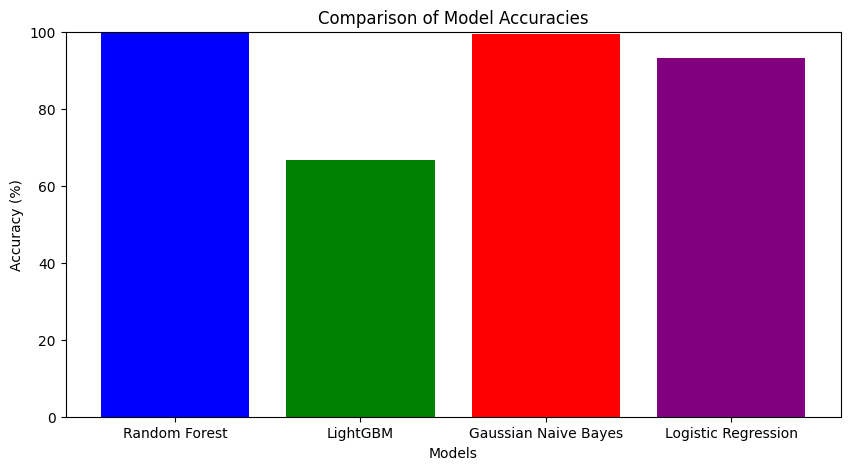

In [ ]:
import matplotlib.pyplot as plt


models = ['Random Forest', 'LightGBM', 'Gaussian Naive Bayes', 'Logistic Regression']
accuracies = [100, 66.7, 99.3, 93.2]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 100)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.show()


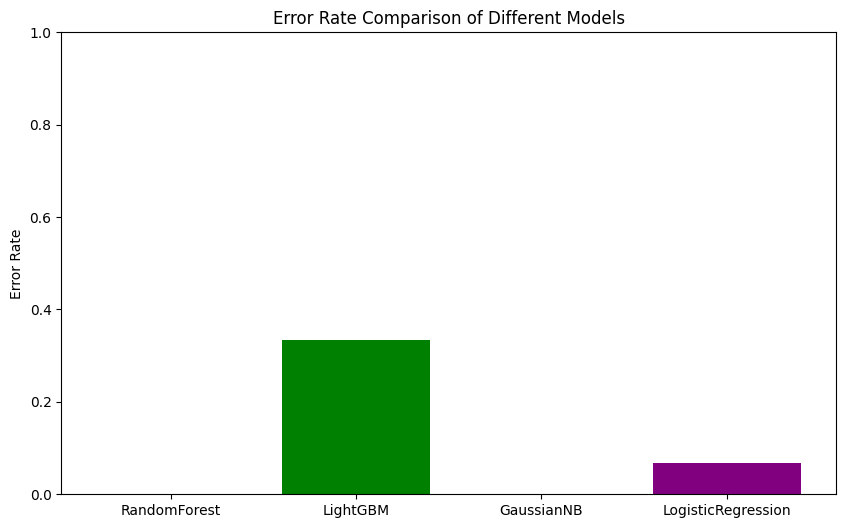

In [ ]:
error_rates = { 'RandomForest': 0.00, 'LightGBM': 0.3329, 'GaussianNB': 0.0007, 'LogisticRegression': 0.0670 } # Plotting the error rates
plt.figure(figsize=(10, 6))
plt.bar(error_rates.keys(), error_rates.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Error Rate')
plt.title('Error Rate Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] Start training from score -1.104731
[LightGBM] [Info] Start training from score -1.090161
[LightGBM] [Info] Start training from score -1.102696
[LightGBM] [Info] Start training from score -7.483119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

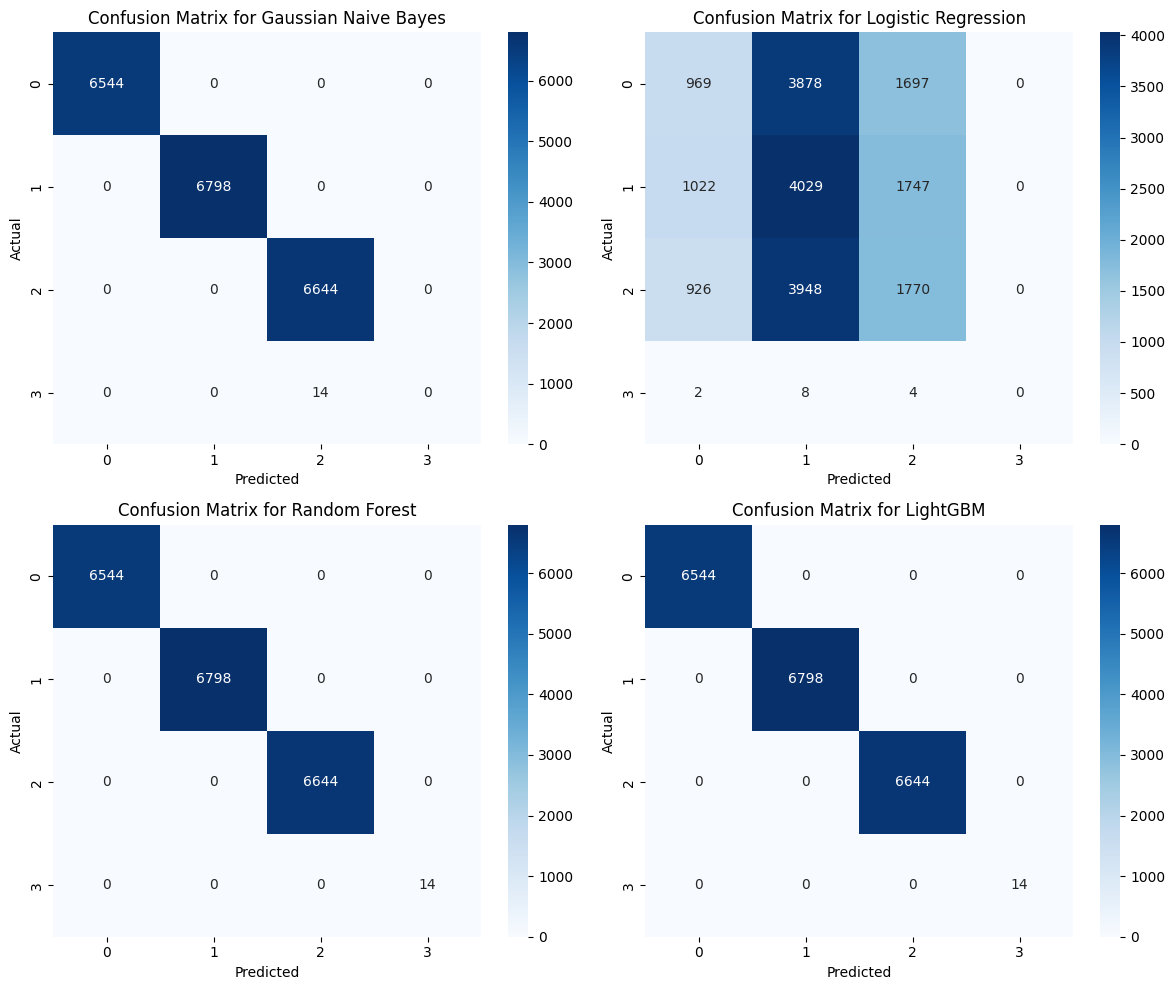

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the models
gnb = GaussianNB()
log_reg = LogisticRegression(max_iter=200)
rand_forest = RandomForestClassifier()
lgbm = LGBMClassifier()

# Train and predict with each model
models = {
    "Gaussian Naive Bayes": gnb,
    "Logistic Regression": log_reg,
    "Random Forest": rand_forest,
    "LightGBM": lgbm
}

# Plot confusion matrices for each model
plt.figure(figsize=(12, 10))
for i, (name, model) in enumerate(models.items()):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 2, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


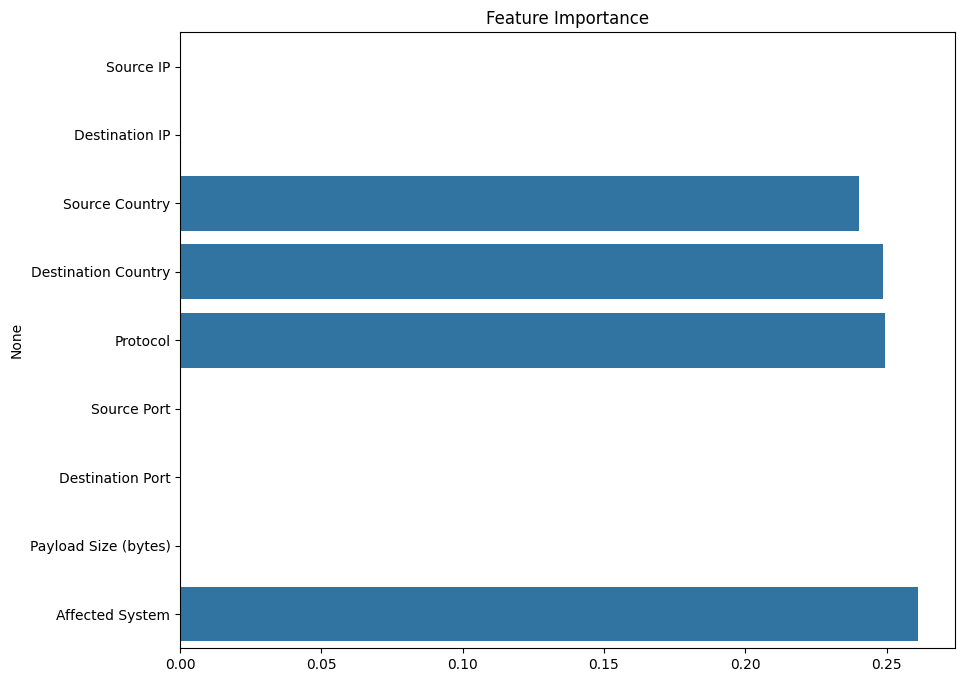

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()



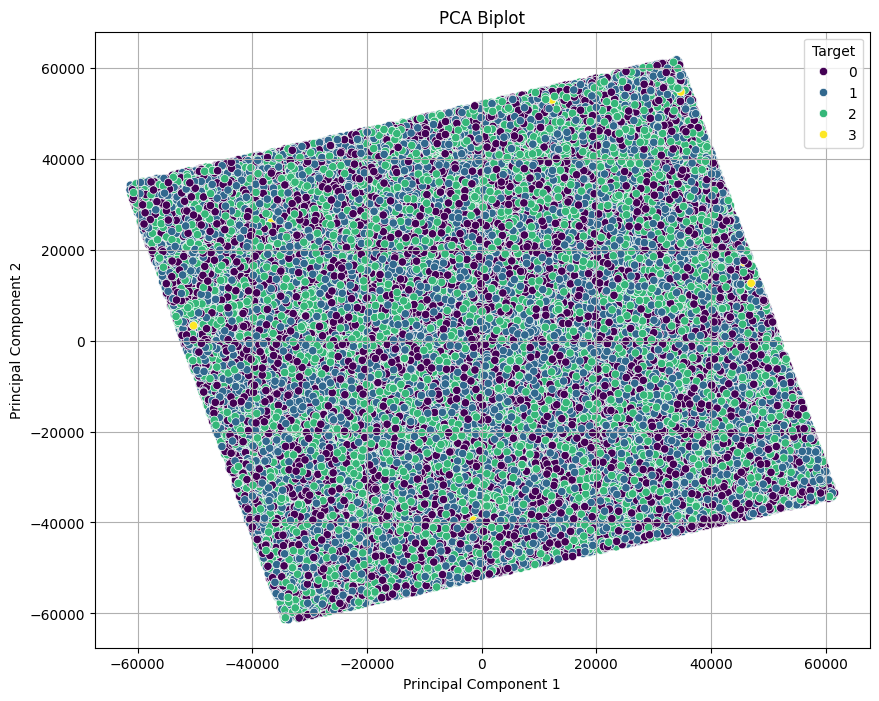

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_train)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Convert y_train to a pandas Series to align the indices
pca_df['target'] = pd.Series(y_train).reset_index(drop=True)

# Plot the PCA biplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='upper right')
plt.grid(True)
plt.show()


